In [49]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [50]:
path = r'C:\Users\Bella\Desktop\Data Analytics\Achievement 4 - Python\09-24-2020-Instacart Basket Analysis'

In [51]:
customers_orders_products_combined = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'customers_orders_products_combined.csv'), index_col = False)

In [52]:
customers_orders_products_combined.head()

Unnamed: 0  user_id First Name_x  Surnam_x Gender_x     STATE_x  Age_x  \
0           0    26711      Deborah  Esquivel   Female    Missouri     48   
1           1    26711      Deborah  Esquivel   Female    Missouri     48   
2           2    26711      Deborah  Esquivel   Female    Missouri     48   
3           3    33890     Patricia      Hart   Female  New Mexico     36   
4           4    33890     Patricia      Hart   Female  New Mexico     36   

  date_joined  n_dependants fam_status_x  ... product_name aisle_id  \
0    1/1/2017             3      married  ...         Soda       77   
1    1/1/2017             3      married  ...         Soda       77   
2    1/1/2017             3      married  ...         Soda       77   
3    1/1/2017             0       single  ...         Soda       77   
4    1/1/2017             0       single  ...         Soda       77   

  department_id prices     busiest_day two_busiest_and_slowest_days max_order  \
0             7    9.0  Regularly busy                     Busy day         8   
1             7    9.0  Regularly busy               Regularly busy         8   
2             7    9.0  Regularly busy                     Busy day         8   
3             7    9.0  Regularly busy               Regularly busy         5   
4             7    9.0  Regularly busy                     Busy day         5   

            loyalty_flag  mean_price median_days_since_prior_order  
0       Regular customer        9.00                          11.0  
1       Regular customer        9.00                          11.0  
2       Regular customer        9.00                          11.0  
3  Non-frequent customer        9.65                          28.0  
4  Non-frequent customer        9.65                          28.0  

[5 rows x 38 columns]

In [29]:
customers_orders_products_combined.columns

Index(['Unnamed: 0', 'user_id', 'First Name_x', 'Surnam_x', 'Gender_x',
       'STATE_x', 'Age_x', 'date_joined', 'n_dependants', 'fam_status_x',
       'Unnamed: 0.1', 'First Name_y', 'Surnam_y', 'Gender_y', 'STATE_y',
       'Age_y', 'date_joined_x', 'fam_status_y', 'date_joined_y', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'busiest_day', 'two_busiest_and_slowest_days', 'max_order',
       'loyalty_flag', 'mean_price', 'median_days_since_prior_order'],
      dtype='object')

In [30]:
# removing unnecessary columns
customers_orders_products_combined = customers_orders_products_combined.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])


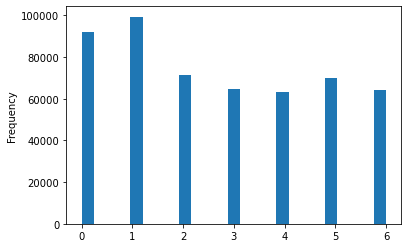

In [31]:
# creating a histogram of the “orders days of week” column
customers_orders_products_combined['order_dow'].plot.hist(bins = 25)

In [32]:
customers_orders_products_combined['order_dow'].mean()

2.7122167820296896

In [33]:
customers_orders_products_combined['order_dow'].max()

6

In [34]:
customers_orders_products_combined['order_dow'].min()

0

The histogram shows that highest amount of orders is submitted on Mondays and the lowest is on Thursdays.

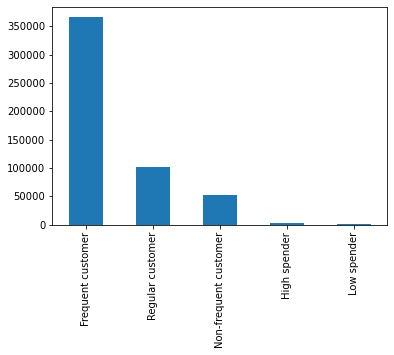

In [35]:
# create plot bar for loyalty_flag column
customers_orders_products_combined['loyalty_flag'].value_counts().plot.bar()

In [36]:
# splitting the dataframe into two dataframes at a 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(customers_orders_products_combined)) <= 0.7

In [37]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [38]:
#  the np.random.rand() function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers are produced. In the code above, the argument given is the length of your dataframe,
np.random.rand(10) 

array([0.98672121, 0.7817425 , 0.36517019, 0.57783622, 0.13185192,
       0.98977324, 0.25082484, 0.17745625, 0.5538333 , 0.4249113 ])

In [39]:
big = customers_orders_products_combined[dev]

In [40]:
small = customers_orders_products_combined[dev]

In [41]:
# create a list holding true/false values to the test np.random.rant()<=0.7
dev = np.random.rand(len(customers_orders_products_combined))<=0.7

In [42]:
# store 70% of the sample in the df big
big = customers_orders_products_combined[dev]

In [43]:
# store 30% of the sample in the df small
small = customers_orders_products_combined[dev]

In [44]:
len(customers_orders_products_combined)

524287

In [45]:
len(big)+len(small)

732394

In [46]:
# reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_dow".
df_2 = small[['order_dow','prices']]

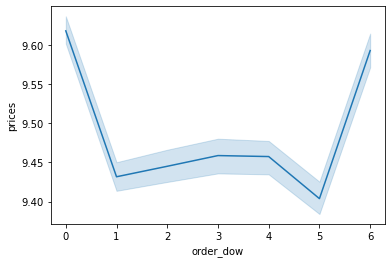

In [47]:
# create a chart
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [48]:
customers_orders_products_combined.to_csv(os.path.join(path, '02 Data','Prepared Data', 'customers_orders_products_combined.csv'))